## Kurtosis(첨도)  
첨도는 정규분포 대비 봉우리 높이의 정도를 말한다.  
-- 정규분포 = 첨도 == 0  
-- 정규분포보다 위로 뾰족 = 첨도 > 0  
-- 정규분포보다 아래로 뾰족 = 첨도 < 0

## Example 1

In [1]:
from scipy.stats import norm, kurtosis
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsfresh import extract_features

In [2]:
np.random.seed(1214)

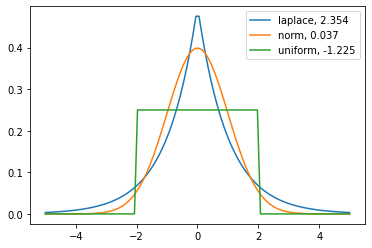

In [3]:
x = np.linspace(-5, 5, 100)

ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']

for distname in distnames:
    if distname == 'uniform':
        # getattr(object, name) --> name에 해당하는 object의 속성값을 가져오는 함수
        # loc 부터 loc + scale 범위의 랜덤한 변수생성 여기서는 -2 ~2 사이 값
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
        
    #rvs를 사용하여 데이터 생성 및 kurtosis 구하기
    data = dist.rvs(size=1000)
    kur = kurtosis(data)
    
    #pdf를 통해 Probability density function 구해서 그래프로 그리기
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()

## Example2

In [4]:
data1 = norm.rvs(size=100, random_state=1)

dist = getattr(stats, 'laplace')
data2 = dist.rvs(size=100, random_state=1)

dist = getattr(stats, 'uniform')(loc=-2, scale=4)
data3 = dist.rvs(size=100, random_state=1)

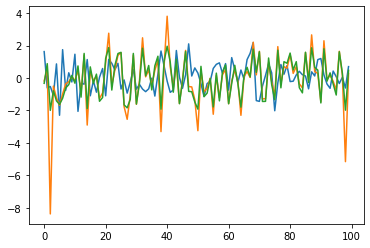

In [5]:
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)

In [6]:
dataVal = [data1,data2,data3]

df3 = pd.DataFrame(data=dataVal)

In [7]:
df3.shape

(3, 100)

* data가 정규분포에 가까울때 kurtosis값이 0에 가장 가까운 것을 볼 수 있다.

In [8]:
df3.kurtosis(axis=1)

0    0.061348
1    6.857646
2   -1.237519
dtype: float64

## Example3

* scipy, pandas, tsfresh로 kurtosis를 구해보자

In [9]:
#Make normal continuous random variable
data = norm.rvs(size=1000, random_state=3)

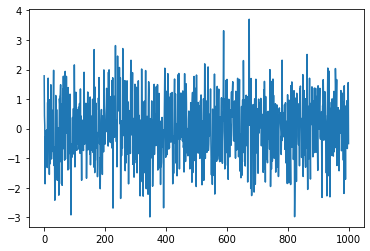

In [10]:
plt.plot(data)

In [11]:
# compute the kurtosis using scipy
kurtosis(data)

-0.06928694200380558

In Fisher’s definiton, the kurtosis of the normal distribution is zero. In the following example, the kurtosis is close to zero, because it was calculated from the dataset, not from the continuous distribution.



In [12]:
df = pd.DataFrame(data)

In [13]:
# compute the kurtosis using pandas
df.kurtosis(axis=0)

0   -0.063611
dtype: float64

In [14]:
df2 = df.copy()
df2['id'] = 0 

In [15]:
df2

,0,id
0,1.788628,0
1,0.436510,0
2,0.096497,0
3,-1.863493,0
4,-0.277388,0
...,...,...
995,-0.670745,0
996,0.022502,0
997,0.347617,0
998,1.559960,0


In [16]:
settings = {'kurtosis':None}

In [17]:
# compute the kurtosis using tsfresh
kurtosis = extract_features(df2, column_id='id', default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 233.74it/s]


In [18]:
kurtosis

,0__kurtosis
0,-0.063611


## References

* Using scipy  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
* Using pandas  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html
* Using tsfresh
https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html#tsfresh.feature_extraction.feature_calculators.kurtosis


* norm.rvs  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


* getattr(stats, 'uniform')(loc=-2, scale=4)  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform


* blog  
https://rfriend.tistory.com/tag/kurtosis  
https://mizykk.tistory.com/73